In [106]:
# Business Problem : How quickly does attrition occur for those employees that leave? 

In [128]:
# Purpose : Here is the definition for attrition: "the gradual reduction of a workforce by employees' leaving and not being replaced rather than by their being laid off" according to
# Oxford languages definition. 

In [ ]:
# Survival Analysis aka Time-to-event analysis: This type of analysis is useful for analyzing the expected duration of time until one event occurs.
# This could be time to attrition (like in this project), death in biological organisms or failure in mechanical systems. 

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
from lifelines import KaplanMeierFitter

In [110]:
file = "C:\Portfolio\Data Engineer Track\Python\IBM Attrition and Performance\IBM_excel.xlsx"

In [111]:
df = pd.read_excel(file)

In [112]:
df.describe()

,Age,Boolean_Attrition,DistanceFromHome (in miles),EmployeeNumber,Male,Annual_Salary,JobLevel,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,9.192517,1024.865306,0.600000,137053.605442,2.063946,2.693197,15.209524,0.793878,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,8.106864,602.024335,0.490065,42285.209396,1.106940,2.498009,3.659938,0.852077,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,1.000000,1.000000,0.000000,62400.000000,1.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,491.250000,0.000000,99840.000000,1.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,7.000000,1020.500000,1.000000,137280.000000,2.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,14.000000,1555.750000,1.000000,174200.000000,3.000000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,29.000000,2068.000000,1.000000,208000.000000,5.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          1470 non-null   int64 
 1   Attrition                    1470 non-null   object
 2   Boolean_Attrition            1470 non-null   int64 
 3   BusinessTravel               1470 non-null   object
 4   Department                   1470 non-null   object
 5   DistanceFromHome (in miles)  1470 non-null   int64 
 6   Education                    1470 non-null   object
 7   EducationField               1470 non-null   object
 8   EmployeeNumber               1470 non-null   int64 
 9   EnvironmentSatisfaction      1470 non-null   object
 10  Gender                       1470 non-null   object
 11  Male                         1470 non-null   int64 
 12  Annual_Salary                1470 non-null   int64 
 13  JobInvolvement               1470

In [114]:
df.shape

(1470, 32)

<AxesSubplot:xlabel='Age', ylabel='Count'>

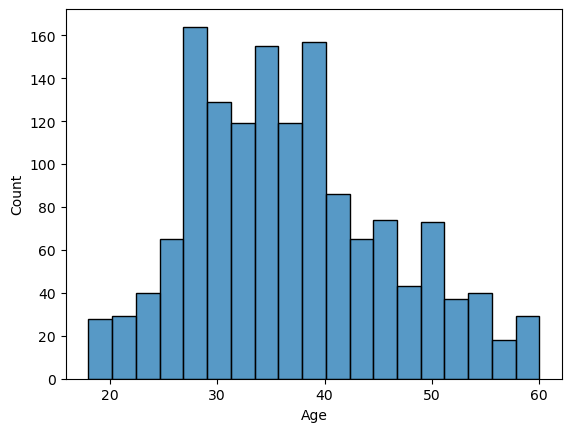

In [115]:
sns.histplot(data = df, x = "Age")

In [116]:
# List of all columns 
df.columns

Index(['Age', 'Attrition', 'Boolean_Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome (in miles)', 'Education', 'EducationField',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'Male',
       'Annual_Salary', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [117]:
# Features to use 
# Years At Company & Attrition

In [118]:
# Tenure

duration = df["YearsAtCompany"]

In [119]:
# Event Observed

attrition = df["Boolean_Attrition"]

In [120]:
# create a kmf object 
kmf = KaplanMeierFitter()

In [121]:
# Fit the data into the model
kmf.fit(duration, attrition, label = "Kaplan Meier Estimate")

<lifelines.KaplanMeierFitter:"Kaplan Meier Estimate", fitted with 1470 total observations, 1233 right-censored observations>

<AxesSubplot:xlabel='timeline'>

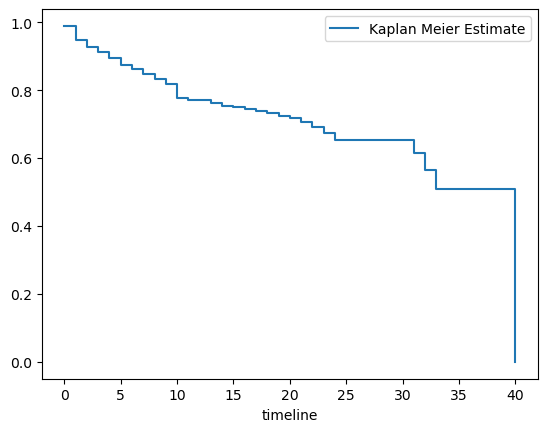

In [122]:
## Create an estimate
kmf.plot(ci_show = False) 

## ci_show is meant for confidence interval, since our data set is too tiny, thus this won't be showed. 

In [123]:
## Two cohorts are compared. 1. Stayed at company 
## 2. Left company.  

groups = df["Attrition"]
# Cohort 1
i1 = (groups == "No")

# Cohort 2
i2 = (groups == "Yes")

<AxesSubplot:xlabel='timeline'>

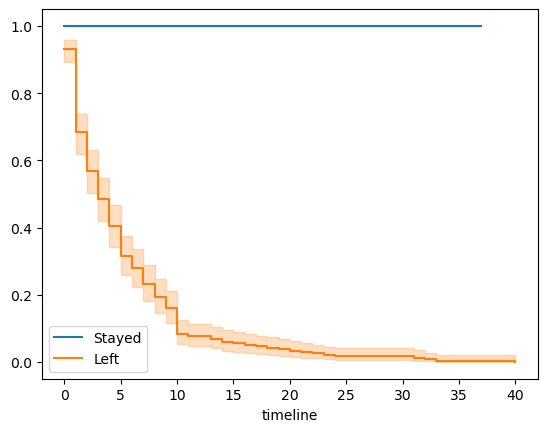

In [131]:
## fit the model for 1st cohort
kmf.fit(duration[i1], attrition[i1], label = "Stayed")
a1 = kmf.plot()

## fit the model for 2nd cohort
kmf.fit(duration[i2], attrition[i2], label = "Left")
kmf.plot(ax = a1)

In [127]:
""" Conclusion : The biggest decline (drop off in probability of employees staying) occurs at the one year mark to about the two and a half year mark.
Then there is a steady drop off until the 10 year mark and a slight decline from the 10 year to 40 year mark. 
"""